**Nama : Delfrin Adiyatma Situmeang**

**Batch : MSIB**

`Program ini dibuat untuk menggunakan feature engineering untuk mengolah data mentah menjadi data siap pakai yang akan dimodelkan dengan Linear Regression`

# Answer To Conceptual Problem is at the Very Bottom of The File


#Importing Libraries

In [373]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler

# Pemodelan ML
from sklearn.linear_model import LinearRegression

# Evaluasi Model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# save model
import pickle
import joblib
import json

#Connect to Kaggle

In [374]:
!pip install kaggle

In [375]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [376]:
!cp /content/kaggle.json ~/.kaggle

In [377]:
!chmod 600 /root/.kaggle/kaggle.json

#Load Data

In [378]:
!kaggle datasets download -d brllrb/uber-and-lyft-dataset-boston-ma

uber-and-lyft-dataset-boston-ma.zip: Skipping, found more recently modified local copy (use --force to force download)


In [379]:
!unzip -q uber-and-lyft-dataset-boston-ma.zip

replace rideshare_kaggle.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [380]:
df = pd.read_csv('rideshare_kaggle.csv')

In [381]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


Cek Missing Values

#EDA

## Missing Values dan Duplicates

In [382]:
#Cek missing values
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Karena missing value ada pada variabel target, maka akan di drop. (Tidak bisa dilakukan imputasi karena data target akan menjadi tidak aktual)

In [383]:
#Cek duolicated
df.duplicated().sum()

0

In [384]:
#menggali informasi dari data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

`Terlihat bahwa tipe dari features yang ada sudah sesuai`

In [385]:
#melihat informasi statistik dari data
df[['price', 'distance', 'latitude', 'longitude', 'pressure']].describe()

,price,distance,latitude,longitude,pressure
count,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000
mean,16.545125,2.189430,42.338172,-71.066151,1010.094766
std,9.324359,1.138937,0.047840,0.020302,13.472899
min,2.500000,0.020000,42.214800,-71.105400,988.090000
25%,9.000000,1.280000,42.350300,-71.081000,999.820000
50%,13.500000,2.160000,42.351900,-71.063100,1009.250000
75%,22.500000,2.920000,42.364700,-71.054200,1021.860000
max,97.500000,7.860000,42.366100,-71.033000,1035.550000


`Terlihat sekilas bahwa terdistribusi secara normal dikarenakan selisih yang kecil antara mean dan median dari features numerikal yang ada, namun akan dipastikan lebih lanjut`

In [386]:
#mencari skewness
skewness = df.skew()

# Kategorisasi skewness
def categorize_skewness(skew):
    if skew > 0.5:
        return 'High Positive Skewness'
    elif skew < -0.5:
        return 'High Negative Skewness'
    elif abs(skew) <= 0.5:
        return 'Low Skewness'

# Menerapkan fungsi kategorisasi pada setiap kolom
skewness_categories = skewness.apply(categorize_skewness)
df_skewness = pd.DataFrame({'column': skewness.index, 'skewness_category': skewness_categories})

print("DataFrame dengan Kategori Skewness:")
df_skewness

DataFrame dengan Kategori Skewness:


<ipython-input-386-7877da3607f9>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = df.skew()


,column,skewness_category
timestamp,timestamp,Low Skewness
hour,hour,Low Skewness
day,day,Low Skewness
month,month,Low Skewness
price,price,High Positive Skewness
distance,distance,High Positive Skewness
surge_multiplier,surge_multiplier,High Positive Skewness
latitude,latitude,High Negative Skewness
longitude,longitude,Low Skewness
temperature,temperature,High Negative Skewness


`Tertampilkan skewness dari masing - masing fitur`

## Analisis Distribusi dari Kolom Harga

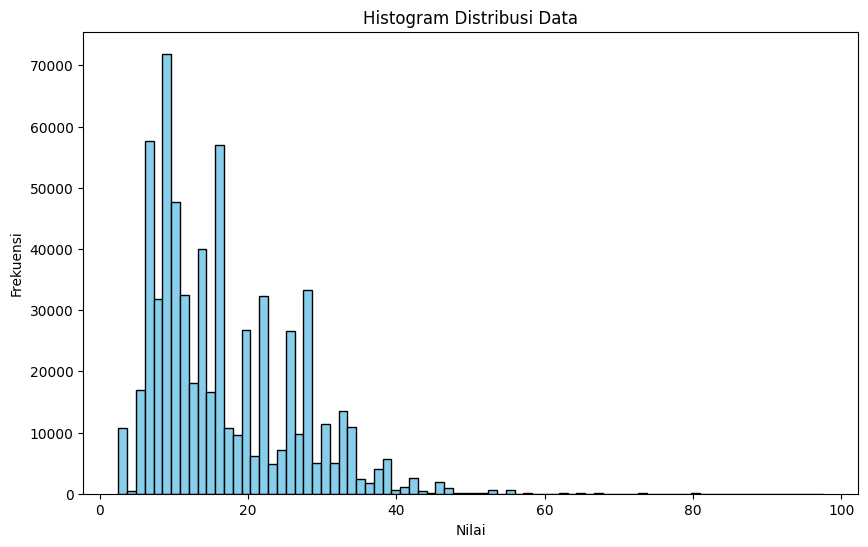

In [387]:
# Plotting histogram
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=80, color='skyblue', edgecolor = 'black')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.title('Histogram Distribusi Data')
plt.show()

`Berdasarkan barplot penyebaran, terlihat bahwa distribusi dari target (price) tidak simetris (tidak normal) dan menunjukan pola positive skewness yang berarti median (nilai tengah) cenderung lebih kecil dari mean (rata-rata), karena distribusi data terpengaruh oleh nilai-nilai yang tinggi di ekor distribusi. `

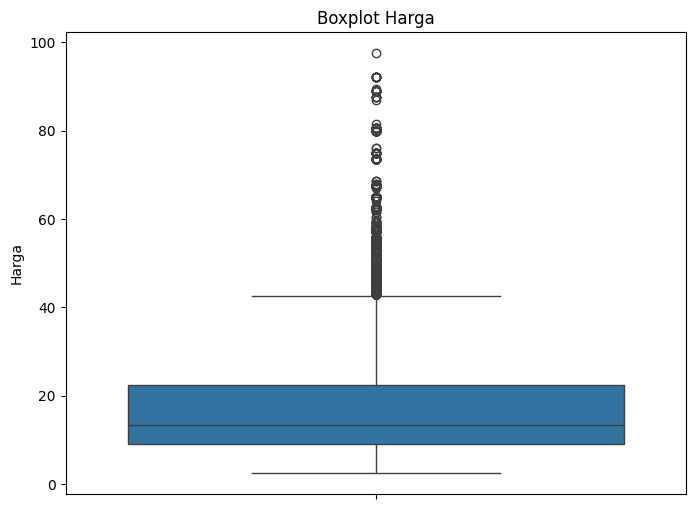

In [388]:
# Plotting boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='price')
plt.title('Boxplot Harga')
plt.ylabel('Harga')
plt.show()

`Berdasarkan boxplot dari harga, terdapat cukup banyak outlier yang terletak di sisi kanan distribusi (nilai yang jauh lebih tinggi dari sebagian besar observasi lainnya) yang mewakili nilai-nilai yang ekstrem dalam data, yang akan memiliki dampak besar terhadap rata-rata dan analisis statistik lainnya sehingga nantinya akan di handle.`


In [389]:
#Cek deskripsi kolom harga
df['price'].describe()

count    637976.000000
mean         16.545125
std           9.324359
min           2.500000
25%           9.000000
50%          13.500000
75%          22.500000
max          97.500000
Name: price, dtype: float64

In [390]:
#Cek harga minimal
print('Harga minimal :', df.price.min())
df[df['price']==df.price.min()][['distance', 'source', 'destination']]

Harga minimal : 2.5


,distance,source,destination
5901,1.53,Boston University,Back Bay
7370,1.39,Haymarket Square,Beacon Hill
8623,0.65,South Station,Financial District
16675,1.47,Fenway,Back Bay
17032,0.98,North End,North Station
...,...,...,...
677015,0.99,Haymarket Square,Financial District
679085,0.66,Theatre District,South Station
679217,1.33,Back Bay,South Station
679502,1.54,Beacon Hill,South Station


In [391]:
#cek harga maksimal
print('Harga maksimal :', df.price.max())
df[df['price']==df.price.max()][['distance', 'source', 'destination']]

Harga maksimal : 97.5


,distance,source,destination
597071,4.43,Financial District,Fenway


## Analisis Source dan Destination

In [392]:
#hitung value dari setiap source
source_counts = df['source'].value_counts()
source_counts

Financial District         58857
Theatre District           57813
Back Bay                   57792
Boston University          57764
North End                  57763
Fenway                     57757
Northeastern University    57756
South Station              57750
Haymarket Square           57736
West End                   57562
Beacon Hill                57403
North Station              57118
Name: source, dtype: int64

<ipython-input-393-693b7c35a437>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(source_counts, palette='viridis')


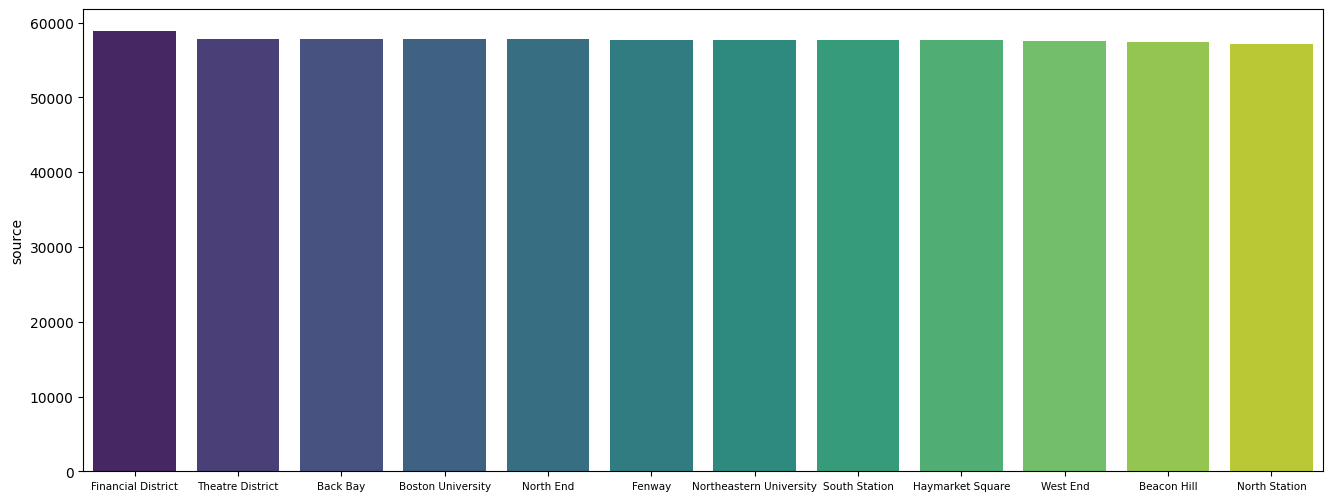

In [393]:
#plotting source
plt.figure(figsize=(16, 6))
sns.barplot(source_counts, palette='viridis')
plt.xticks(fontsize=7.5)
plt.show()

`Terlihat bahwa semua source memiliki nilai yang kurang lebih sama di kisaran 50.000`

In [394]:
#hitung value dari setiap destination
dest_counts = df['destination'].value_counts()
dest_counts

Financial District         58851
Theatre District           57798
Back Bay                   57780
Haymarket Square           57764
Boston University          57764
Fenway                     57757
North End                  57756
Northeastern University    57755
South Station              57749
West End                   57575
Beacon Hill                57403
North Station              57119
Name: destination, dtype: int64

<ipython-input-395-abb5cd4c5506>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(dest_counts, palette='viridis')


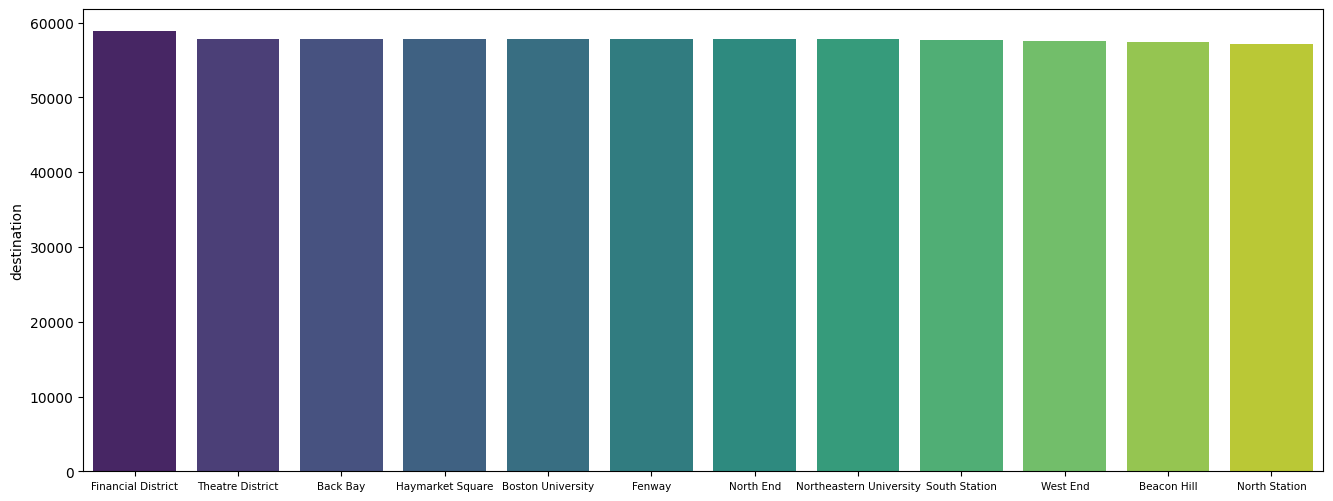

In [395]:
#plotting destination
plt.figure(figsize=(16, 6))
sns.barplot(dest_counts, palette='viridis')
plt.xticks(fontsize=7.5)
plt.show()

`Terlihat bahwa semua destination memiliki nilai yang kurang lebih sama di kisaran 50.000`

In [396]:
#Melihat destination dan source bersama latitude dan longitude
df.groupby(by=["destination","source"]).agg({'latitude':'mean','longitude':'mean'})

latitude  longitude
destination source                                       
Back Bay    Boston University        42.336904 -71.066127
            Fenway                   42.337840 -71.065812
            Haymarket Square         42.337070 -71.065139
            North End                42.338142 -71.066312
            Northeastern University  42.336810 -71.065419
...                                        ...        ...
West End    Fenway                   42.338440 -71.066429
            Haymarket Square         42.339464 -71.066280
            North End                42.337216 -71.066243
            Northeastern University  42.340173 -71.066657
            South Station            42.339025 -71.066998

[72 rows x 2 columns]

## Analisis Cab type

<ipython-input-397-ee44cddbd784>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df['cab_type'], palette='viridis')


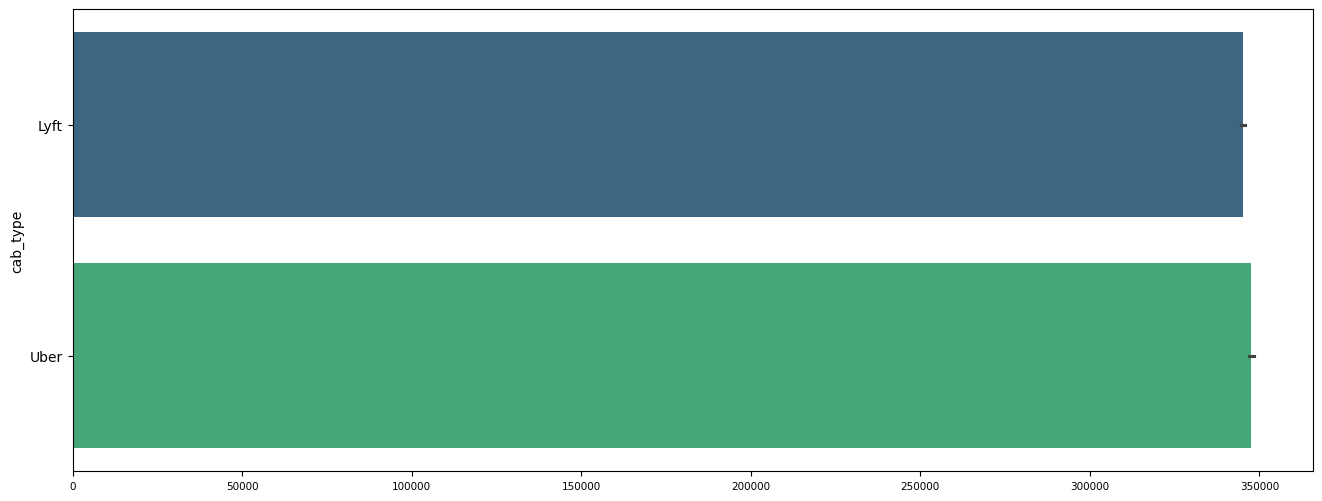

In [397]:
#Melihat jumlah order berdasarkan tipe cab
plt.figure(figsize=(16, 6))
sns.barplot(df['cab_type'], palette='viridis')
plt.xticks(fontsize=7.5)
plt.show()

`Terlihat bahwa type cab dari total order berjumlah sama berkisar lebih dari 300 ribu`

## Numerical Feature

In [398]:
#buat dataframe gabungan hasil filtering untuk analisis korelasi
df_no_na = df.dropna()

In [399]:
correlation = df_no_na.corr(method = 'spearman')['price']

# Mencari dan Menampilkan korelasi yang lebih dari 0.1
high_correlation = correlation[correlation > 0.1]

print("Korelasi yang Lebih dari 0.1:")
print(high_correlation)

<ipython-input-399-97f162639174>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df_no_na.corr(method = 'spearman')['price']


Korelasi yang Lebih dari 0.1:
price               1.000000
distance            0.333871
surge_multiplier    0.165611
Name: price, dtype: float64


`Fitur yang berpengaruh secara signifikan terhadap target adalah price dan distance, selanjutnya akan di plot dengan heatmap`

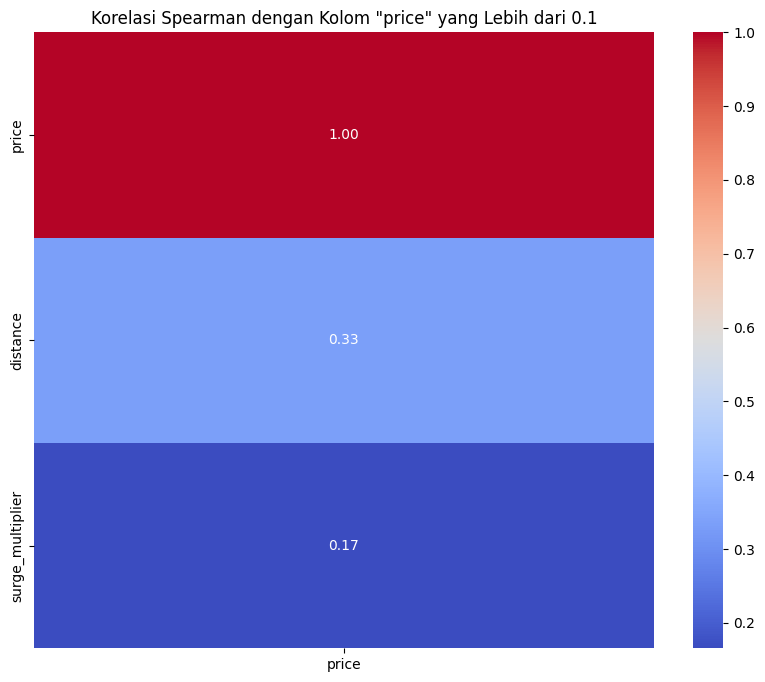

In [400]:
df_high_correlation = pd.DataFrame(high_correlation)

# Plot heatmap korelasi tinggi
plt.figure(figsize=(10, 8))
sns.heatmap(df_high_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Spearman dengan Kolom "price" yang Lebih dari 0.1')
plt.show()

`Maka fitur numerikal yang lain akan di drop`

`Fitur yang akan digunakan pada proses modelling hanyalah fitur yang memiliki korelasi tinggi terhadap target. Sehingga fitur dengan korelasi rendah akan di drop (Karena Tidak memengaruhi model secara signifikan)`

## Analisis distribusi distance


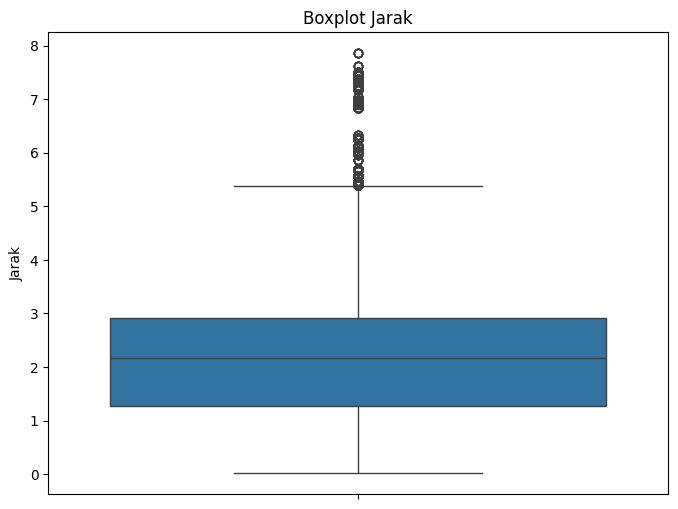

In [401]:
# Plotting boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='distance')
plt.title('Boxplot Jarak')
plt.ylabel('Jarak')
plt.show()

`Berdasarkan boxplot dari distance (jarak), terdapat cukup banyak outlier yang terletak di sisi kanan distribusi (nilai yang jauh lebih tinggi dari sebagian besar observasi lainnya) yang mewakili nilai-nilai yang ekstrem dalam data, yang akan memiliki dampak besar terhadap rata-rata dan analisis statistik lainnya sehingga nantinya akan di handle.`


## Categorical Feature

In [402]:
#Cek fitur kategorik
category_ft = df_no_na.select_dtypes(include=['object','category']).columns.tolist()
for column in df_no_na[category_ft]:
    print(f'{column} : {df_no_na[column].unique()}')
    print()

id : ['424553bb-7174-41ea-aeb4-fe06d4f4b9d7'
 '4bd23055-6827-41c6-b23b-3c491f24e74d'
 '981a3613-77af-4620-a42a-0c0866077d1e' ...
 '633a3fc3-1f86-4b9e-9d48-2b7132112341'
 '727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e'
 'e7fdc087-fe86-40a5-a3c3-3b2a8badcbda']

datetime : ['2018-12-16 09:30:07' '2018-11-27 02:00:23' '2018-11-28 01:00:22' ...
 '2018-12-17 05:00:04' '2018-12-03 16:48:07' '2018-12-02 05:07:57']

timezone : ['America/New_York']

source : ['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']

destination : ['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']

cab_type : ['Lyft' 'Uber']

product_id : ['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a

`Fitur berbasis tanggal tidak digunakan pada saat modelling maka datetime akan di drop. Terlihat bahwa 'timezone' hanya memiliki 1 value unique dan 'product_id' memiliki cukup banyak value yang tidak teridentifikasi, sehingga keduanya tidak akan digunakan pada Model.`

In [403]:
from scipy.stats import kendalltau
# Mendapatkan kolom kategorikal
categorical_columns = df_no_na.select_dtypes(include=['object', 'category']).columns

# Hitung korelasi menggunakan Kendall Tau untuk setiap kolom kategorikal
for col in categorical_columns:
    tau, p_value = kendalltau(df_no_na[col], df_no_na['price'])
    print(f"Korelasi menggunakan Kendall Tau untuk kolom '{col}':")
    print("Nilai tau:", tau)
    print("p-value:", p_value)
    print("\n")

Korelasi menggunakan Kendall Tau untuk kolom 'id':
Nilai tau: 0.0003143976537751096
p-value: 0.7112678006144835


Korelasi menggunakan Kendall Tau untuk kolom 'datetime':
Nilai tau: -3.118763211216651e-05
p-value: 0.9707102198259975


Korelasi menggunakan Kendall Tau untuk kolom 'timezone':
Nilai tau: nan
p-value: nan


Korelasi menggunakan Kendall Tau untuk kolom 'source':
Nilai tau: -0.013055772826511497
p-value: 2.3529257792795844e-49


Korelasi menggunakan Kendall Tau untuk kolom 'destination':
Nilai tau: -0.03151675812702735
p-value: 2.33081827277028e-278


Korelasi menggunakan Kendall Tau untuk kolom 'cab_type':
Nilai tau: -0.057004480669791274
p-value: 0.0


Korelasi menggunakan Kendall Tau untuk kolom 'product_id':
Nilai tau: 0.05077238589375829
p-value: 0.0


Korelasi menggunakan Kendall Tau untuk kolom 'name':
Nilai tau: -0.39709440059363416
p-value: 0.0


Korelasi menggunakan Kendall Tau untuk kolom 'short_summary':
Nilai tau: 0.00026118857283030585
p-value: 0.77814224307702

`Jika nilai p-value kurang dari 0.05, maka dapat disimpulkan bahwa terdapat korelasi yang signifikan antara dua variabel. Sehingga fitur yang berkorelasi tinggi dengan target price adalah destination, cab_type, dan name`

# Splitting Data

`Data akan dibagi menjadi 4 kelompok yaitu x_test, y_text, x_train, dan y_train untuk persiapan pembangunan model`

In [404]:
#membagi data menjadi data fitur dan data target
X = df.drop('price',axis=1)
y = df['price']

In [405]:
#Membagi data x dan y berdasarkan train dan test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=150)

In [406]:
X_train.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
42562,778c58f2-cf72-40de-aa8d-8ae004f2f317,1.543318e+09,11,27,11,2018-11-27 11:21:22,America/New_York,Back Bay,North End,Uber,...,0.1430,1543338000,36.34,1543377600,47.11,1543320000,32.26,1543377600,44.14,1543320000
663306,de589daa-a3c5-4d9c-a946-1bbc1545406e,1.545083e+09,21,17,12,2018-12-17 21:45:14,America/New_York,West End,Boston University,Uber,...,0.0217,1545066000,34.22,1545044400,41.44,1545076800,28.61,1545044400,36.09,1545076800
657058,f01692f7-4084-4afe-aa38-5a61c273d55b,1.543555e+09,5,30,11,2018-11-30 05:13:02,America/New_York,Haymarket Square,Beacon Hill,Uber,...,0.0003,1543593600,28.78,1543579200,42.64,1543600800,26.35,1543575600,40.61,1543611600
480884,4180f4d5-f2aa-4811-a815-08fe4c3117ed,1.543469e+09,5,29,11,2018-11-29 05:22:37,America/New_York,North Station,Northeastern University,Uber,...,0.0000,1543510800,35.33,1543550400,44.75,1543510800,31.26,1543550400,38.45,1543510800
268414,2877db8d-0e51-47c2-9d39-48bced50c7f2,1.543336e+09,16,27,11,2018-11-27 16:27:22,America/New_York,Financial District,Fenway,Uber,...,0.1430,1543338000,35.84,1543377600,46.24,1543320000,31.95,1543377600,43.32,1543320000


In [407]:
y_train.head()

42562     35.0
663306     NaN
657058     7.5
480884    13.5
268414    11.5
Name: price, dtype: float64

# Feature Engineering

## Handling Missing Value

`Karena terdapat missing value pada fitur target, maka selanjutnya akan di drop (tidak bisa diimputasi karena prediksi model nantinya akan menjadi tidak aktual)`

In [408]:
#hapus missing value dari y_train
y_trainf = y_train.dropna()

In [409]:
#hapus missing value dari y_test
y_testf = y_test.dropna()

In [410]:
print("Jumlah baris data train:, ", len(y_trainf))

Jumlah baris data train:,  510364


In [411]:
print("Jumlah baris data test:, ", len(y_testf))

Jumlah baris data test:,  127612


`Karena terdapat beberapa rows dengan missing value yang di drop pada data target, maka rows pada data fitur akan disesuaikan`

In [412]:
x_trainf = X_train.loc[y_trainf.index]
x_testf = X_test.loc[y_testf.index]

In [413]:
print("Jumlah baris data train:, ", len(x_trainf))
print("Jumlah baris data test:, ", len(x_testf))

Jumlah baris data train:,  510364
Jumlah baris data test:,  127612


`Dapat dilihat bahwa jumlah baris dari data fitur maupun target telah sama`

## Feature Selection

`Berdasarkan hasil EDA, fitur yang berkorelasi tinggi dengan "price" dan akan digunakan adalah distance, surge_multiplier, destination, cab_type, product_id, dan name`

In [414]:
x_trainf_new = x_trainf[['distance', 'surge_multiplier', 'destination', 'cab_type', 'name']]
x_trainf_new

,distance,surge_multiplier,destination,cab_type,name
42562,3.16,1.0,North End,Uber,Black SUV
657058,1.68,1.0,Beacon Hill,Uber,UberPool
480884,3.39,1.0,Northeastern University,Uber,UberPool
268414,4.48,1.0,Fenway,Uber,UberX
156405,1.26,1.0,Theatre District,Lyft,Lux
...,...,...,...,...,...
509847,1.16,1.0,Theatre District,Uber,Black SUV
337038,0.61,1.0,West End,Uber,Black
264498,3.39,1.0,North Station,Uber,UberX
683515,3.41,1.0,North Station,Uber,UberPool


In [415]:
x_testf_new = x_testf[['distance', 'surge_multiplier', 'destination', 'cab_type', 'name']]
x_testf_new

,distance,surge_multiplier,destination,cab_type,name
575942,0.45,1.0,South Station,Lyft,Lux Black
480871,2.45,1.0,Beacon Hill,Lyft,Lyft XL
270281,1.30,1.0,Haymarket Square,Lyft,Lyft
438126,0.62,1.0,South Station,Lyft,Lux Black XL
194992,2.00,1.0,Theatre District,Lyft,Lyft
...,...,...,...,...,...
182212,1.55,1.0,Beacon Hill,Lyft,Lux Black
59279,4.48,1.0,Fenway,Uber,UberXL
206649,0.92,1.0,West End,Uber,UberX
519991,0.55,1.0,South Station,Uber,UberXL


In [416]:
x_trainf_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510364 entries, 42562 to 586980
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          510364 non-null  float64
 1   surge_multiplier  510364 non-null  float64
 2   destination       510364 non-null  object 
 3   cab_type          510364 non-null  object 
 4   name              510364 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.4+ MB


In [417]:
x_testf_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127612 entries, 575942 to 114584
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          127612 non-null  float64
 1   surge_multiplier  127612 non-null  float64
 2   destination       127612 non-null  object 
 3   cab_type          127612 non-null  object 
 4   name              127612 non-null  object 
dtypes: float64(2), object(3)
memory usage: 5.8+ MB


In [418]:
x_trainf_new['surge_multiplier'].value_counts()

1.00    493573
1.25      8877
1.50      4093
1.75      1899
2.00      1791
2.50       122
3.00         9
Name: surge_multiplier, dtype: int64

`Pada proses EDA dengan boxplot kita ketahui bahwa terdapat outliers pada beberapa fitur dan target yang dapat mengganggu model, maka outliers tersebut akan di handle`

## Handling Outlier

### Outlier Fitur

In [419]:
skewnesstrain = x_trainf_new.skew()
skewnesstrain

<ipython-input-419-c158716e6ba0>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewnesstrain = x_trainf_new.skew()


distance            0.822883
surge_multiplier    7.965906
dtype: float64

In [420]:
skewnesstest = x_testf_new.skew()
skewnesstest

<ipython-input-420-452281a2d71b>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewnesstest = x_testf_new.skew()


distance            0.792340
surge_multiplier    7.980786
dtype: float64

In [421]:
x_trainf_new['surge_multiplier'].value_counts()

1.00    493573
1.25      8877
1.50      4093
1.75      1899
2.00      1791
2.50       122
3.00         9
Name: surge_multiplier, dtype: int64

`Pada kasus ini, surge_mukltiplier hanya memiliki 7 nilai value unique, sehingga tipenya akan dianggap sebagai categorical, maka yang akan di handle hanyalah outliers pada distance`

In [422]:
#Karena distribusi dari distance tidak normal (skew) maka akan digunakan methode IQR pada outlier trimmer
from feature_engine.outliers import OutlierTrimmer
ot_skew = OutlierTrimmer(capping_method='iqr', tail='both', fold=1.5,variables=['distance'])

In [423]:
#trim outlier pada fitur train
x_trainf_new_filtered = ot_skew.fit_transform(x_trainf_new)

In [424]:
#trim outlier pada fitur test
x_testf_new_filtered = ot_skew.fit_transform(x_testf_new)

In [425]:
#Cek panjang fitur train dan data test
print('Panjang data fitur train :', len(x_trainf_new_filtered))
print('Panjang data target train :', len(y_trainf))

Panjang data fitur train : 504504
Panjang data target train : 510364


In [426]:
#Cek panjang target train dan data test
print('Panjang data fitur train :', len(x_testf_new_filtered))
print('Panjang data target train :', len(y_testf))

Panjang data fitur train : 126371
Panjang data target train : 127612


`Dikarenakan panjang dari train dan test berbeda setelah proses trimming maka akan dilakukan penyesuaian jumlah baris`

In [427]:
y_trainf_filtered = y_trainf.loc[x_trainf_new_filtered.index]
y_testf_filtered = y_testf.loc[x_testf_new_filtered.index]

In [428]:
#Cek panjang fitur train dan data test
print('Panjang data fitur train :', len(x_trainf_new_filtered))
print('Panjang data target train :', len(y_trainf_filtered))

Panjang data fitur train : 504504
Panjang data target train : 504504


In [429]:
#Cek panjang target train dan data test
print('Panjang data fiturtrain :', len(x_testf_new_filtered))
print('Panjang data target train :', len(y_testf_filtered))

Panjang data fiturtrain : 126371
Panjang data target train : 126371


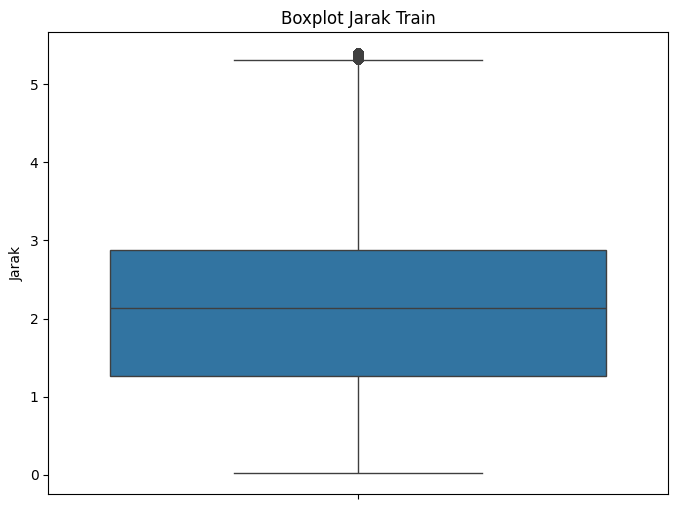

In [430]:
# Plotting boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=x_trainf_new_filtered, y='distance')
plt.title('Boxplot Jarak Train')
plt.ylabel('Jarak')
plt.show()

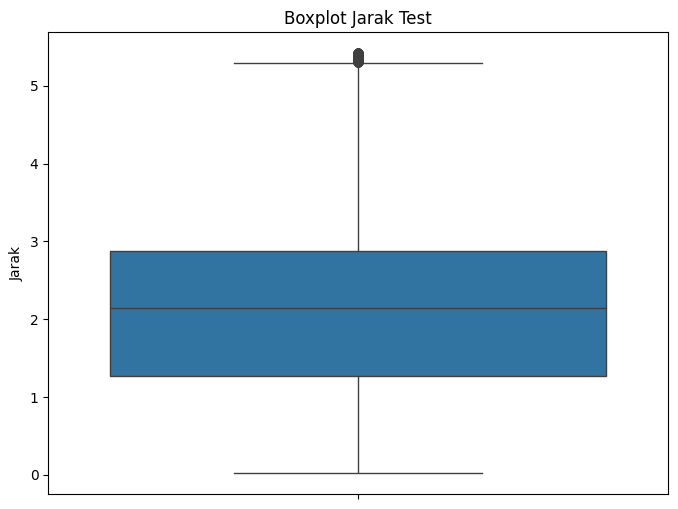

In [431]:
# Plotting boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=x_testf_new_filtered, y='distance')
plt.title('Boxplot Jarak Test')
plt.ylabel('Jarak')
plt.show()

`Terlihat bahwa outlier telah berhasil di remove dan index telah berhasil disesuaikan`

### Outlier Target

In [432]:
#Cek outlier pada price train
skewness_price_train = y_trainf_filtered.skew()
skewness_price_train

1.0301751832419601

In [433]:
#Cek outlier pada price test
skewness_price_test = y_testf_filtered.skew()
skewness_price_test

1.0246848591746909

In [434]:
#Karena distribusi dari distance tidak normal (skew) maka akan digunakan methode IQR pada outlier trimmer
from feature_engine.outliers import OutlierTrimmer
ot_skew_price = OutlierTrimmer(capping_method='iqr', tail='both', fold=1.5,variables=['price'])

In [435]:
#ubah jadi dataframe
y_trainf_filteredf = y_trainf_filtered.to_frame()
y_testf_filteredf = y_testf_filtered.to_frame()

In [436]:
#trim outlier pada price train
y_trainf_new_filtered = ot_skew_price.fit_transform(y_trainf_filteredf)

In [437]:
#trim outlier pada price test
y_testf_new_filtered = ot_skew_price.fit_transform(y_testf_filteredf)

In [438]:
#Cek panjang fitur train dan data test
print('Panjang data fitur train :', len(x_trainf_new_filtered))
print('Panjang data target train :', len(y_trainf_new_filtered))

Panjang data fitur train : 504504
Panjang data target train : 500890


In [439]:
#Cek panjang target train dan data test
print('Panjang data fitur train :', len(x_testf_new_filtered))
print('Panjang data target train :', len(y_testf_new_filtered))

Panjang data fitur train : 126371
Panjang data target train : 125411


`Dikarenakan panjang dari train dan test berbeda setelah proses trimming maka akan dilakukan penyesuaian jumlah baris`

In [440]:
#Penyesuaian index
x_trainf_new_filtereds = x_trainf_new_filtered.loc[y_trainf_new_filtered.index]
x_testf_new_filtereds = x_testf_new_filtered.loc[y_testf_new_filtered.index]

In [441]:
#Cek panjang fitur train dan data test
print('Panjang data fitur train :', len(x_trainf_new_filtereds))
print('Panjang data target train :', len(y_trainf_new_filtered))

Panjang data fitur train : 500890
Panjang data target train : 500890


In [442]:
#Cek panjang target train dan data test
print('Panjang data fitur train :', len(x_testf_new_filtereds))
print('Panjang data target train :', len(y_testf_new_filtered))

Panjang data fitur train : 125411
Panjang data target train : 125411


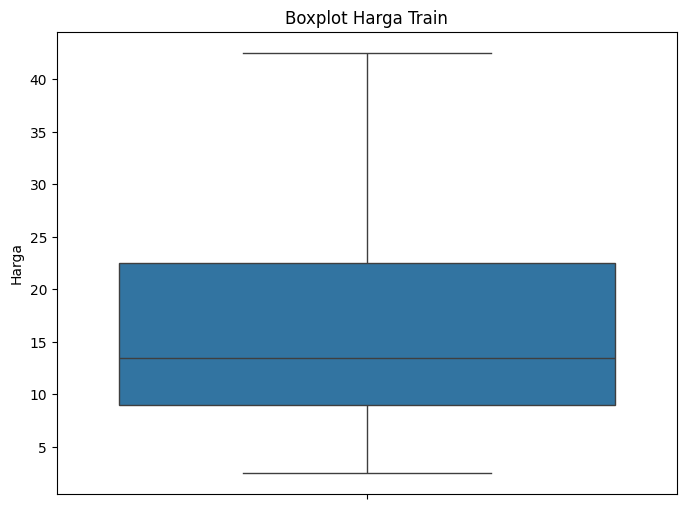

In [443]:
# Plotting boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=y_trainf_new_filtered, y='price')
plt.title('Boxplot Harga Train')
plt.ylabel('Harga')
plt.show()

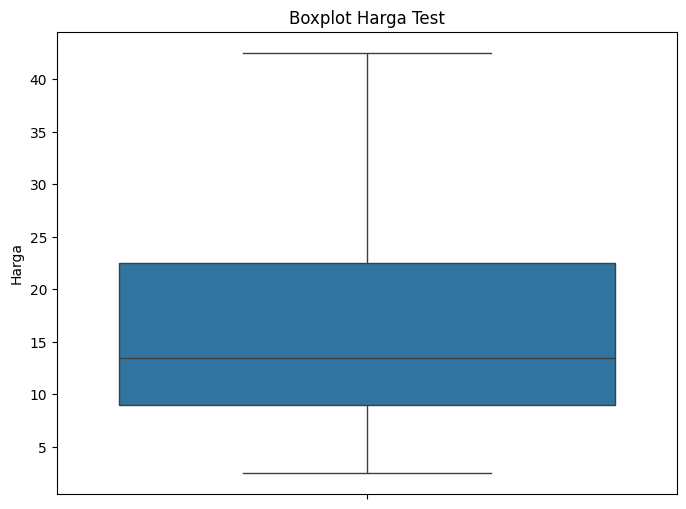

In [444]:
# Plotting boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=y_testf_new_filtered, y='price')
plt.title('Boxplot Harga Test')
plt.ylabel('Harga')
plt.show()

`Terlihat bahwa outlier telah berhasil di remove dan index telah berhasil disesuaikan`

## Scaling

`Fitur yang numerikal hanya berjumlah 1 sehingga tidak perlu dilakukan scaling`

# Encoding

`Fitur - fitur yang merupakan object akan di encode.`

In [445]:
#Cek informasi
x_trainf_new_filtereds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500890 entries, 42562 to 586980
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          500890 non-null  float64
 1   surge_multiplier  500890 non-null  float64
 2   destination       500890 non-null  object 
 3   cab_type          500890 non-null  object 
 4   name              500890 non-null  object 
dtypes: float64(2), object(3)
memory usage: 22.9+ MB


`Terlihat bahwa ketiga fitur yang merupakan object bertipe nominal sehingga akan digunakan One Hot Encoder`

In [446]:
#import onehotencoder
from sklearn.preprocessing import OneHotEncoder

In [447]:
x_trainf_new_filtereds['cab_type'].value_counts()

Uber    258820
Lyft    242070
Name: cab_type, dtype: int64

In [448]:
#list fitur nominal
list_nom = ['destination', 'cab_type', 'name']

#Lakukan onehotencoding
enc_ohe = OneHotEncoder(sparse_output=False)
enc_ohe.fit(x_trainf_new_filtereds[list_nom])
x_train_ohe = enc_ohe.transform(x_trainf_new_filtereds[list_nom])
x_test_ohe = enc_ohe.transform(x_testf_new_filtereds[list_nom])

In [449]:
#Cek nama fitur
x_trainf_new_filtereds['destination'].value_counts()

Theatre District           42426
Haymarket Square           42412
Back Bay                   42372
North End                  42214
Beacon Hill                42096
West End                   42061
Fenway                     42047
Financial District         41974
South Station              41824
North Station              41754
Northeastern University    41233
Boston University          38477
Name: destination, dtype: int64

In [450]:
#Cek nama fitur
x_trainf_new_filtereds['cab_type'].value_counts()

Uber    258820
Lyft    242070
Name: cab_type, dtype: int64

In [451]:
#Cek nama fitur
x_trainf_new_filtereds['name'].value_counts()

UberXL          43354
UberPool        43224
Black           43173
WAV             43167
UberX           43164
Black SUV       42738
Lyft            41073
Shared          40801
Lux             40762
Lyft XL         40698
Lux Black       40435
Lux Black XL    38301
Name: name, dtype: int64

In [452]:
#Mengambil nama dari semua fitur
feature_names = enc_ohe.get_feature_names_out(input_features=list_nom)
feature_names

array(['destination_Back Bay', 'destination_Beacon Hill',
       'destination_Boston University', 'destination_Fenway',
       'destination_Financial District', 'destination_Haymarket Square',
       'destination_North End', 'destination_North Station',
       'destination_Northeastern University', 'destination_South Station',
       'destination_Theatre District', 'destination_West End',
       'cab_type_Lyft', 'cab_type_Uber', 'name_Black', 'name_Black SUV',
       'name_Lux', 'name_Lux Black', 'name_Lux Black XL', 'name_Lyft',
       'name_Lyft XL', 'name_Shared', 'name_UberPool', 'name_UberX',
       'name_UberXL', 'name_WAV'], dtype=object)

In [453]:
#Membuat dataframe
x_train_ohe_df = pd.DataFrame(x_train_ohe, columns=feature_names)
x_test_ohe_df = pd.DataFrame(x_test_ohe, columns=feature_names)

In [454]:
#Cek
x_train_ohe_df.head()

,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,...,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [455]:
#Cek
x_test_ohe_df.head()

,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,...,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [456]:
#resetting index
x_trainf_new_filtereds.reset_index(drop=True, inplace=True)
x_testf_new_filtereds.reset_index(drop=True, inplace=True)

In [457]:
x_train_final = pd.concat([x_trainf_new_filtereds, x_train_ohe_df], axis=1)
x_test_final = pd.concat([x_testf_new_filtereds, x_test_ohe_df], axis=1)

In [458]:
#drop kolom destination, cab_type dan name
x_train_final.drop(columns = ['destination', 'cab_type', 'name'], axis=1, inplace=True)
x_test_final.drop(['destination', 'cab_type', 'name'], axis=1, inplace=True)

In [459]:
x_train_final.head()

,distance,surge_multiplier,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,...,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,3.16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.68,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3.39,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4.48,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.26,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [460]:
x_test_final.head()

,distance,surge_multiplier,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,...,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0.45,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.45,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.30,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.62,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Linear Regression Modelling

## Model Definition

`Model Linear Regression adalah suatu model yang menggambarkan hubungan linier antara satu atau lebih variabel independen (fitur) dan variabel dependen (target). Algoritma ini dapat memberikan estimasi yang baik dan akurat jika hubungan antara fitur dan target adalah linier.`

**Hyperparameter:**

- fit_intercept

**Metrik:**
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- R2 score

## Model Training

In [461]:
#Definisikan model
model = LinearRegression()
model.fit(x_train_final, y_trainf_new_filtered)

LinearRegression()

In [462]:
#fit data
y_pred_train = model.predict(x_train_final)
y_pred_test = model.predict(x_test_final)

## Model Evaluation

In [463]:
#Cek Residual
y_test_residuals = y_testf_new_filtered - y_pred_test
y_test_residuals

,price
575942,-1.037598
480871,1.286621
270281,2.222168
438126,0.812012
194992,0.215332
...,...
182212,-0.793457
59279,-1.211426
206649,2.259277
519991,-0.603027


In [464]:
#Cari MAE
print('MAE dari Train Set : ', mean_absolute_error(y_trainf_new_filtered, y_pred_train))
print('MAE dari Test Set  : ', mean_absolute_error(y_testf_new_filtered, y_pred_test))

MAE dari Train Set :  1.6420328926230061
MAE dari Test Set  :  1.6437555310327145


`Diperoleh rata-rata kesalahan prediksi model adalah sekitar 1.64 unit dari nilai yang sebenarnya pada data latih maupun data uji. Semakin rendah nilai MAE, semakin baik kinerja modelnya. Dengan demikian, dapat disimpulkan model tampaknya memiliki kinerja yang konsisten di kedua dataset.`

In [465]:
#Cari MSE
print('MSE dari Train Set : ', mean_squared_error(y_trainf_new_filtered, y_pred_train))
print('MSE dari Test Set  : ', mean_squared_error(y_testf_new_filtered, y_pred_test))

MSE dari Train Set :  4.865971774544158
MSE dari Test Set  :  4.8283369008139925


`Diperoleh MSE yaitu 4.87 (untuk data latih) dan 4.83 (untuk data uji). Semakin rendah nilai MSE, semakin akurat prediksi model. Dengan demikian, dapat disimpulkan model tampaknya memiliki kinerja yang konsisten di kedua dataset.`

In [466]:
#cari r2 score
print('R-squared score Train Set: ', r2_score(y_trainf_new_filtered, y_pred_train))
print('R-squared score Test Set: ', r2_score(y_testf_new_filtered, y_pred_test))

R-squared score Train Set:  0.9362732137146887
R-squared score Test Set:  0.9369128101395983


`R-squared score dari kedua dataset tidak berbeda jauh berkisar 0.936. Ini berarti bahwa sekitar 93.6% dari variasi dalam target dapat dijelaskan oleh fitur-fitur yang digunakan dalam model. Nilai R^2 yang diperoleh termasuk tinggi, ini menunjukkan bahwa model memiliki kemampuan yang baik untuk memprediksi target, dan memiliki kinerja yang konsisten di kedua dataset tersebut.`

## Model Saving

In [467]:
#Save Model & Encoding
with open('model_linreg.pkl', 'wb') as file1:
  joblib.dump(model,file1)

with open('enc_ohe.pkl', 'wb') as file2:
  joblib.dump(enc_ohe,file2)

In [468]:
#Load Model & Encoding
with open('model_linreg.pkl', 'rb') as file1:
  model = joblib.load(file1)

with open('enc_ohe.pkl', 'rb') as file2:
  enc_ohe = joblib.load(file2)

# Model Inference

In [469]:
# Membuat dataframe dummy
data = {
    'distance': [1.45, 2.45, 0.62],  # Ubah None menjadi nilai yang sesuai
    'surge_multiplier': [1.25, 1.0, 1.0],  # Ubah None menjadi nilai yang sesuai
    'destination': ['South Station', 'Beacon Hill', 'Haymarket Square'],
    'cab_type': ['Lyft', 'Lyft', 'Uber'],
    'name': ['Lyft XL', 'Lux', 'WAV']  # Ubah None menjadi nilai yang sesuai
}

df_dummy = pd.DataFrame(data)
df_dummy

,distance,surge_multiplier,destination,cab_type,name
0,1.45,1.25,South Station,Lyft,Lyft XL
1,2.45,1.00,Beacon Hill,Lyft,Lux
2,0.62,1.00,Haymarket Square,Uber,WAV


In [470]:
# Encode dataframe dummy
nom = ['destination', 'cab_type', 'name']
dummy_ohe = enc_ohe.transform(df_dummy[nom])

nama_fitur = enc_ohe.get_feature_names_out(input_features=nom)
dummy_ohe_df = pd.DataFrame(dummy_ohe, columns=nama_fitur)
dummy_ohe_df = pd.concat([df_dummy, dummy_ohe_df], axis=1)
dummy_ohe_df.drop(columns=['destination', 'cab_type', 'name'], axis=1, inplace=True)
dummy_ohe_df

,distance,surge_multiplier,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,...,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,1.45,1.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2.45,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.62,1.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [471]:
# Prediksi dummy df
y_pred_dummy = model.predict(dummy_ohe_df)
y_pred_dummy

array([[16.14697266],
       [17.65380859],
       [ 5.63964844]])

`Data dummy berhasil diprediksi`

# Kesimpulan

`Dengan mengerjakan GC4 ini saya dapat memahami tentang konsep dasar regresi dan cara kerja model Linear Regression dalam memodelkan hubungan antara variabel independen dan dependen secara linier. Saya telah melakukan proses persiapan data dengan baik, termasuk mengatasi missing values, mengencode variabel kategorikal, melakukan scaling terhadap fitur-fitur numerik, serta mmahami pentingnya pemisahan data menjadi data latih dan data uji untuk menghindari overfitting dan memvalidasi kinerja model Melakukan pelatihan (training) model dengan data latih dengan parameter yang tepat dan hasil yang memuaskan. Sehingga saya menghasilkan model akhir yang bekerja dengan baik pada data dummy, memberikan prediksi yang akurat dan konsisten.`





# Conceptual Problem

## Sebutkan dan jelaskan asumsi yang dipakai oleh Linear Regression !

`Asumsi 1 : Hubungan linear`

Asumsi bahwa hubungan antara variabel independen dan variabel dependen (fitur dan target) adalah linier, yang berarti bahwa efek dari setiap "x" terhadap "y" adalah konstan dalam setiap perubahan nilai "x".

`Asumsi 2 : Tidak ada multikolinearitas`

Korelasi antara setiap variabel independen (fitur) dan variabel dependen (target) seharusnya kuat. Akan tetapi, antara variabel independen harus tidak ada korelasi sana sekali. Jika antar variabel independen berkorelasi, berarti kedua variabel mengandung informasi yang sama sehingga akan membuat model kesulitan untuk menentukan variabel mana yang sebenarnya membuat perubahan.

`Asumsi 3 : Normalitas Residual/Error`

Distribusi error (residuals) adalah normal, yang berarti bahwa nilai-nilai sisa terdistribusi secara simetris di sekitar nilai rata-rata nol.

`Asumsi 4 : Tidak ada autokorelasi`

Ini secara *simple* merujuk pada error (residuals) dari satu observasi tidak berkorelasi dengan kesalahan dari observasi lainnya. Ini berarti tidak ada pola tertentu dalam sisa-sisa yang terkait dengan urutan waktu atau urutan observasi.

`Asumsi 5 : Homokedastisitas`

Varians dari error pada data berpola konstan di setiap value variabel independen. Yang berarti tidak ada pola tertentu dalam distribusi kesalahan sepanjang rentang nilai prediktor.






## Tunjukkan dan tafsirkan arti dari slope dan intercept yang didapat dari model yang telah Anda bangun !

In [472]:
# Menampilkan slope
slope = model.coef_[0]
print("Slope dari model linear regression:", slope)

Slope dari model linear regression: [ 2.78643716e+00  1.36421175e+01  2.23955369e+12  2.23955369e+12
  2.23955369e+12  2.23955369e+12  2.23955369e+12  2.23955369e+12
  2.23955369e+12  2.23955369e+12  2.23955369e+12  2.23955369e+12
  2.23955369e+12  2.23955369e+12  2.20295515e+12 -2.03097623e+12
  2.07918733e+12  2.07918733e+12 -2.15474405e+12 -2.15474405e+12
 -2.15474405e+12 -2.15474405e+12 -2.15474405e+12 -2.15474405e+12
  2.07918733e+12  2.07918733e+12  2.07918733e+12  2.07918733e+12]


`Setiap nilai dalam array yang ditampilkan merupakan nilai yang mewakili slope (kemiringan) untuk setiap variabel independen (fitur) yang digunakan dalam model linear regression.`

In [473]:
# Menampilkan intercept
intercept = model.intercept_
print("Intercept dari model linear regression:", intercept)

Intercept dari model linear regression: [-2.28776479e+12]


`intercept = -2.28776479e+12 dalam konteks model linear regression berarti bahwa ketika semua nilai fitur (variabel independen) adalah nol, nilai target (variabel dependen) akan diperkirakan atau diestimasi menjadi -2.28776479e+12.`